# Código para geração de gráficos

O código abaixo cria os gráficos utilizados no trabalho com base nos arquivos de saída do algoritmo criado com Java.

## Importando dados

Antes de mais nada, precisamos importar os dados de duração do algoritmo de determinantes aplicando:

- Nenhuma otimização (baseline);

- Otimizações iniciais (versão 1);

- Otimizações extras (versão 2).

In [1]:
import pandas as pd

# Constantes que servem de rótulos dos dataframes seguintes
HEADER = ['tentativa_1', 'tentativa_2', 'tentativa_3']
INDEX = [3, 5, 7, 9, 11, 13]

# Bases de dados extraídas dos arquivos de saída de cada algoritmo
baseline_times = pd.read_csv('saida_baseline_em_ns.txt', sep=' ', lineterminator='\n', names=HEADER, index_col=False)
baseline_times.index = INDEX

v1_optimization_times = pd.read_csv('saida_otimizacao_v1_em_ns.txt', sep=' ', lineterminator='\n', names=HEADER, index_col=False)
v1_optimization_times.index = INDEX

v2_optimization_times = pd.read_csv('saida_otimizacao_v2_em_ns.txt', sep=' ', lineterminator='\n', names=HEADER, index_col=False)
v2_optimization_times.index = INDEX

## Visualizando os dados

Vamos mostrar o comportamento temporal dos algoritmos usando os dados importados. Antes disso, vamos visualizar as tabelas com os valores de tempo.

OBS: Os valores estão expressos em nanossegundos (para ordens < 9) e em milissegundos (para ordens >= 9).

Nas tabelas, as linhas representam a ordem matricial e as colunas representam as três tentativas utilizadas para fazer medições.

Primeiro, vamos adicionar aos dados as *médias* de cada algoritmo:

In [2]:
baseline_times['media'] = baseline_times.mean(axis=1)
v1_optimization_times['media'] = v1_optimization_times.mean(axis=1)
v2_optimization_times['media'] = v2_optimization_times.mean(axis=1)

Vamos adicionar aos dados o *desvio padrão* de cada algoritmo:

In [3]:
baseline_times['desvio'] = baseline_times.std(axis=1)
v1_optimization_times['desvio'] = v1_optimization_times.std(axis=1)
v2_optimization_times['desvio'] = v2_optimization_times.std(axis=1)

Agora, podemos visualizar os dados em formato de tabela.

Primeiro, o resultado da execução do algoritmo sem otimizações (baseline).

In [4]:
baseline_times

,tentativa_1,tentativa_2,tentativa_3,media,desvio
3,44283,107998,163954,1.054117e+05,4.888970e+04
5,338809,284300,276817,2.999753e+05,2.762896e+04
7,7450144,10134753,17412725,1.166587e+07,4.208840e+06
9,229005678,82271042,116632163,1.426363e+08,6.266272e+07
11,10296979500,7336718657,7206334937,8.280011e+09,1.427205e+09
13,1104894652384,1102737675447,1101266217301,1.102966e+12,1.490089e+09


Os resultados do algoritmo com otimizações iniciais (versão 1):

In [5]:
v1_optimization_times

,tentativa_1,tentativa_2,tentativa_3,media,desvio
3,33520,6626441,19829,2.226597e+06,3.111165e+06
5,4359336,205272,161724,1.575444e+06,1.968589e+06
7,4737705,1229867,1025762,2.331111e+06,1.703758e+06
9,56645016,42703385,34998095,4.478217e+07,8.958731e+06
11,4826241294,4279638167,3974137700,4.360006e+09,3.524811e+08
13,531570230276,411490964267,341475143877,4.281788e+11,7.849797e+10


Os resultados do algoritmo com otimizações extras (versão 2):

In [6]:
v2_optimization_times

,tentativa_1,tentativa_2,tentativa_3,media,desvio
3,166936,889952,31469,3.627857e+05,3.768431e+05
5,268892,341074,138447,2.494710e+05,8.385427e+04
7,7199562,2126376,20102736,9.809558e+06,7.567317e+06
9,41582610,50195566,29350616,4.037626e+07,8.552561e+06
11,4961380827,4338109429,3978193763,4.425895e+09,4.061559e+08
13,533706785792,410240425255,342476311062,4.288078e+11,7.916580e+10


In [7]:
import matplotlib.pyplot as plt

In [8]:
def showResults(datasets, labels, log=True, show_std=True, show_in_ms=False):
    plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário

    for i, data in enumerate(datasets):
        index = data.index
        mean = data['media']
        std = data['desvio']

        if show_in_ms:
            mean = mean / (1000 * 1000)
            std = std / (1000 * 1000)

        # Plotar a média das linhas
        plt.plot(mean.to_numpy(), marker='o', label=labels[i])  # Remova 'index.to_numpy()' aqui

        # Preencher a área entre a média +/- desvio padrão
        if show_std:
            plt.fill_between(range(len(index)), mean - std, mean + std, alpha=0.2)  # Use 'range(len(index))' como eixo x

    plt.xlabel('Ordem Matricial')
    plt.ylabel('Tempo ({})'.format("ms" if show_in_ms else "ns"))
    plt.title('Tempo de Execução Média - Algoritmos para Cálculo de Determinante')
    plt.legend()

    if log:
        plt.yscale('log')
    
    # Defina os rótulos do eixo x para usar os valores de index.to_numpy()
    plt.xticks(range(len(index)), index.to_numpy())

    plt.grid()
    plt.show()

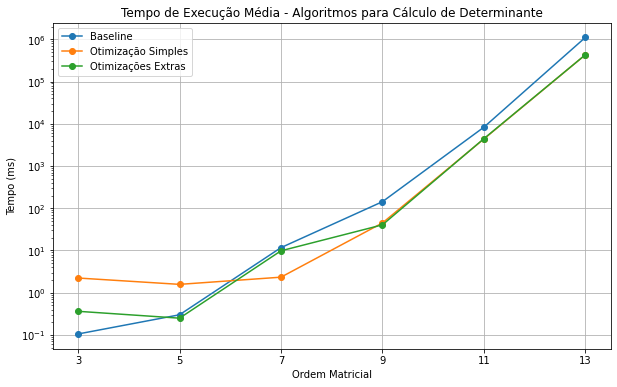

In [9]:
showResults(
    datasets=[baseline_times, v1_optimization_times, v2_optimization_times],
    labels=['Baseline', 'Otimização Simples', 'Otimizações Extras'],
    log=True,
    show_std=False,
    show_in_ms=True
)

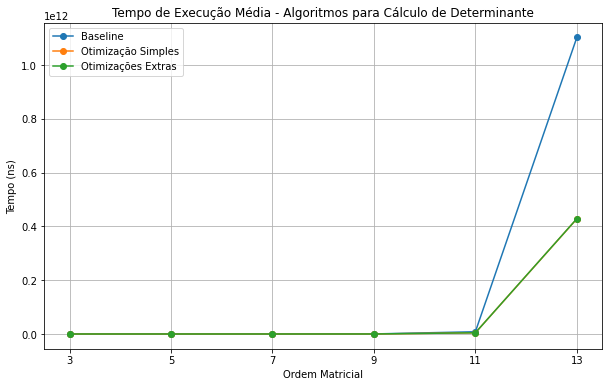

In [14]:
showResults(
    datasets=[baseline_times, v1_optimization_times, v2_optimization_times],
    labels=['Baseline', 'Otimização Simples', 'Otimizações Extras'],
    log=False,
    show_std=False,
    show_in_ms=False
)